In [37]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import chi2_contingency



# QUESTION 1

## USING IQR METHOD

In [38]:
pd.read_csv("patient_data.csv")
df = pd.read_csv("patient_data.csv")

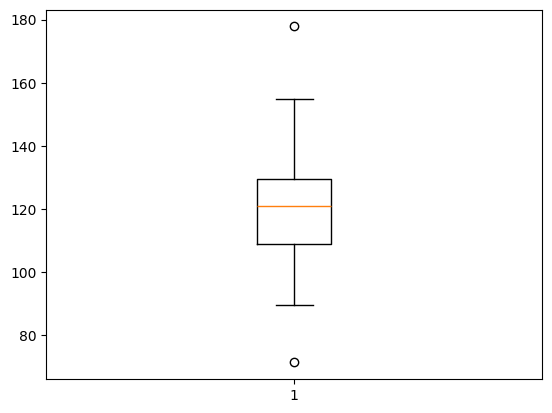

In [39]:
plt.boxplot(df['BloodPressure'])
plt.show()

In [40]:
#count total rows
df.count()
# sorting according to BloodPressure
df = df.sort_values(by=['BloodPressure'])

In [41]:
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

77.7625
160.66249999999997


In [42]:
#print  outliers
df[(df['BloodPressure'] < lower_bound) | (df['BloodPressure'] > upper_bound)]

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
82,83,Male,74,234.8,71.4,North,Medium
29,30,Female,60,197.8,177.8,South,High


## USING Z SCORE METHOD

In [43]:
# finding out liers using z score
import numpy as np
treshold = 3
mean = df['BloodPressure'].mean()
std = df['BloodPressure'].std()
print(mean)
print(std)
for i in df['BloodPressure']:
    z = (i-mean)/std
    if np.abs(z) > treshold:
        print(i)


119.854
15.834729890562414
71.4
177.8


## Question 2 (PART A)



In [45]:
#calculate mean of 20 sample chelosterollevel
df['CholesterolLevel'].sample(20).mean()

np.float64(204.51500000000001)

In [46]:
# perfoming t test on sample mean and mean
ttest, pvalue = scipy.stats.ttest_1samp(df['CholesterolLevel'].sample(20), 195)
print(ttest,pvalue)

-0.36480688059506877 0.7192845474658457


In [47]:
critical_value = scipy.stats.t.ppf(1-(0.05/2), 19)
print(critical_value)

2.093024054408263


In [48]:
if np.abs(ttest) > np.abs(critical_value):
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Accept null hypothesis


In [49]:
if pvalue < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Accept null hypothesis


## QUESTION 2 (PART B)


In [56]:
original_values = pd.crosstab(df['Gender'], df['RiskCategory'])
original_values

chi2, p, dof, expected = chi2_contingency(original_values)
print(chi2, p, dof, expected)


1.2769946980473286 0.5280853561197303 2 [[14.   20.72 21.28]
 [11.   16.28 16.72]]


In [57]:
if p < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Accept null hypothesis


In [58]:
alpha = 0.05
critical_value = scipy.stats.chi2.ppf(1-alpha, dof)
print(critical_value)

5.991464547107979


In [59]:
if chi2 > critical_value:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Accept null hypothesis


# QUESTION 3

In [51]:
# 1. Import required libraries.
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# 2. Define a simple first-order ODE: dy/dt = -2y + 1
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate

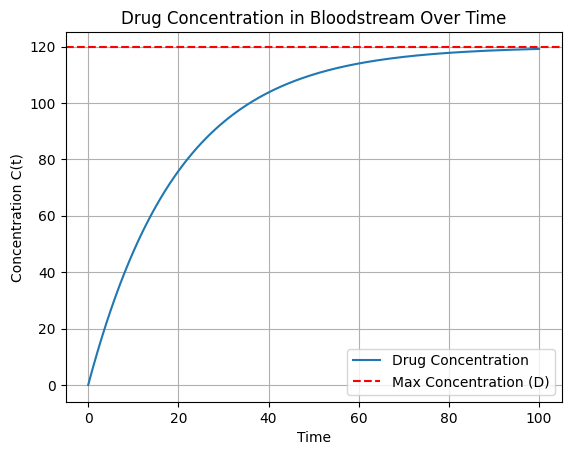

In [60]:
# Parameters
k = 0.05
D = 120

# ODE function
def dCdt(C, t):
    return k * (D - C)

# Initial condition
C0 = 0

# Time values
t = np.linspace(0, 100, 200)  # from t=0 to t=100, 200 points

# Solve ODE
C = odeint(dCdt, C0, t)

# Plot
plt.plot(t, C, label='Drug Concentration')
plt.axhline(D, color='r', linestyle='--', label='Max Concentration (D)')
plt.xlabel('Time')
plt.ylabel('Concentration C(t)')
plt.title('Drug Concentration in Bloodstream Over Time')
plt.legend()
plt.grid(True)
plt.show()